<a href="https://colab.research.google.com/github/arnaldojr/cognitivecomputing/blob/master/material/aulas/IA/lab10/data-augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objetivos

  - Conhecer e praticar Aumento de dados

## Data Augmentation

O aumento de dados é uma técnica amplamente utilizada no campo do aprendizado profundo e da visão computacional para melhorar a generalização e o desempenho dos modelos de aprendizado de máquina. Essa técnica é especialmente útil em cenários onde os conjuntos de dados são limitados ou desequilibrados, pois ajuda a criar variações nos dados existentes, aumentando assim a quantidade de dados disponíveis para treinamento e reduzindo o overfitting.

O overfitting ocorre quando um modelo de aprendizado de máquina aprende padrões específicos do conjunto de dados de treinamento e não consegue generalizar adequadamente para novos dados. Isso pode levar a um desempenho ruim quando o modelo é exposto a dados não vistos anteriormente. A técnica de aumento de dados aborda esse problema criando exemplos sintéticos, aplicando transformações às imagens originais, como rotação, translação, redimensionamento e inversão. Essas transformações geram variações das imagens originais que podem ajudar o modelo a aprender características mais generalizáveis e a se tornar mais robusto a possíveis variações nos dados de entrada.

De forma geral em imagens pode ser aplicado as transformaçõs:

- Rotação
- Translação (deslocamento horizontal e vertical)
- Zoom (in e out)
- Inversão horizontal e vertical
- Ajuste de brilho e contraste
- Ruído (adicionar ruído gaussiano ou salt-and-pepper)
- Corte aleatório (Random Cropping)
- Existem mais....

## Como usar Data Augmentation

Para demonstrar, vamos aplicar essa técnica no dataset do Cifar10.


In [1]:
# Carrega os dados
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

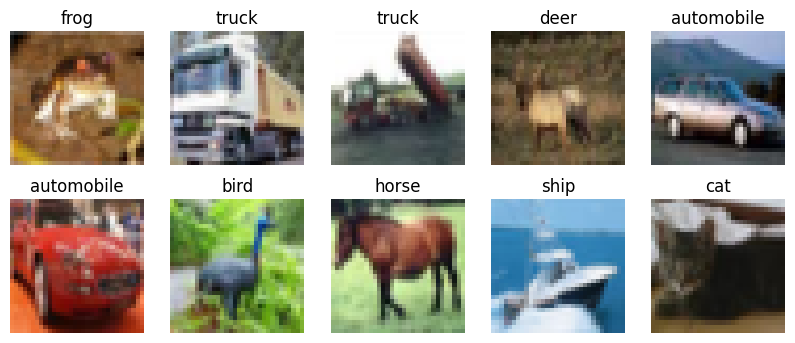

In [2]:
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Função para exibir imagens do conjunto de dados
def show_images(images, labels, n_rows=2, n_cols=5):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.set_title(class_names[labels[i][0]])
        ax.axis('off')
    plt.show()

show_images(x_train, y_train)

No Keras usamos o pacote ``ImageDataGenerator``.

A partir dele vamos aplicar várias transformações nas imagens do conjunto de dados durante o treinamento do modelo.

`rotation_range` = 15
  
  - Isso permitirá que as imagens sejam rotacionadas aleatoriamente em um intervalo de até ±15 graus.

`width_shift_range` = 0.1
  
  - Este parâmetro permite que as imagens sejam deslocadas horizontalmente. O valor 0.1 significa que a imagem pode ser deslocada aleatoriamente até 10% de sua largura.

`height_shift_range` = 0.1

  - Similar ao parâmetro anterior, mas para deslocamento vertical. As imagens podem ser deslocadas aleatoriamente até 10% de sua altura.

`shear_range` = 0.1

  - Este parâmetro permite que uma distorção de cisalhamento seja aplicada às imagens. Um cisalhamento é uma transformação que desliza uma parte da imagem em uma direção, enquanto a outra parte é deslizada na direção oposta. O valor 0.1 indica a intensidade do cisalhamento.

`zoom_range` = 0.1

  - Isso permite que as imagens sejam ampliadas ou reduzidas aleatoriamente. O valor 0.1 indica que o zoom pode variar de 0,9 (zoom out) a 1,1 (zoom in).

`horizontal_flip` = True

  - Isso permite que as imagens sejam espelhadas horizontalmente (ou seja, invertidas de esquerda para direita) com uma probabilidade de 50%.

`fill_mode` = 'nearest'

  - Durante transformações como rotação ou deslocamento, podem aparecer alguns pixels vazios na imagem. O fill_mode determina como preencher esses pixels. O valor 'nearest' significa que ele usará o valor do pixel mais próximo para preencher os pixels vazios.

`rescale` = 1./255

  - Este é um passo importante de pré-processamento. As imagens geralmente têm valores de pixel no intervalo [0, 255]. Este parâmetro irá reescalar esses valores para o intervalo [0, 1], dividindo cada pixel por 255. Isso é comumente feito para facilitar a convergência durante o treinamento de redes neurais.

Existem outros parametros e não é obrigatório o uso de todos são necessários, vai depender do problema que está sendo atacado.

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(
    rotation_range=15,          # Rotaciona as imagens em até 15 graus
    width_shift_range=0.1,      # Desloca as imagens horizontalmente em até 10%
    height_shift_range=0.1,     # Desloca as imagens verticalmente em até 10%
    shear_range=0.1,            # Aplica cisalhamento
    zoom_range=0.1,             # Aplica zoom
    horizontal_flip=True,       # Inverte as imagens horizontalmente
    fill_mode='nearest',        # Preenche os pixels vazios após transformações
    rescale=1./255)             # Normaliza os valores dos pixels para o intervalo [0, 1]


## desafio: 

Avalie os atributos que podem ser usados no ImageDataGenerator para aumentar o conjunto de dados de forma eficiente

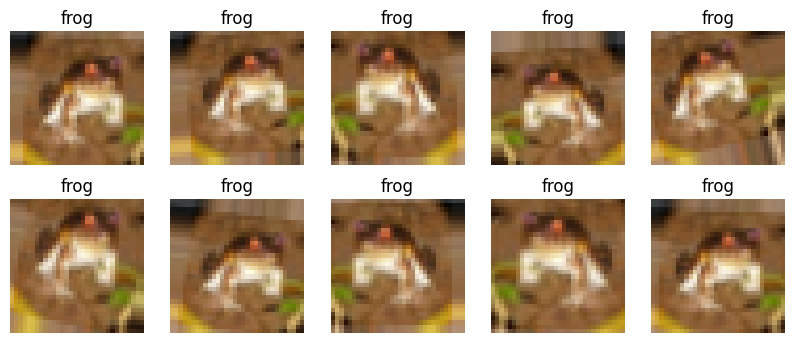

In [7]:
import numpy as np

def show_augmented_images(data_gen, image, label, n_rows=2, n_cols=5):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4))
    img_iterator = data_gen.flow(np.array([image]), np.array([label]))

    for i, ax in enumerate(axes.flat):
        img, lbl = next(img_iterator)
        ax.imshow(img[0])
        ax.set_title(class_names[lbl[0].item()])
        ax.axis('off')
    plt.show()


# Selecionar uma imagem do conjunto de dados
image_index = 0
image = x_train[image_index]
label = y_train[image_index]

# Exibir imagens aumentadas
show_augmented_images(data_gen, image, label)


Note nas variações criadas a partir de uma única imagem.

In [8]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Definição da entrada
inputs = Input(shape=(32, 32, 3))

# Bloco convolucional 1
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Bloco convolucional 2
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Flatten + densas
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

# Saída (10 classes)
outputs = Dense(10, activation='softmax')(x)

# Criação do modelo funcional
model = Model(inputs=inputs, outputs=outputs)

# Compilação
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Resumo da arquitetura
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,204,682 (4.60 MB)

 Trainable params: 1,204,682 (4.60 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Definir o número de imagens aumentadas por imagem original
augmentation_factor = 5

# Criar listas vazias para armazenar as imagens e rótulos aumentados
x_train_augmented = []
y_train_augmented = []

# Aplicar a augmentação de dados
for img, lbl in zip(x_train, y_train):
    x_train_augmented.append(img)  # Adicionar a imagem original
    y_train_augmented.append(lbl)  # Adicionar o rótulo original

    for _ in range(augmentation_factor - 1):
        # Gerar uma imagem aumentada
        augmented_img = data_gen.random_transform(img)

        # Adicionar a imagem e o rótulo aumentado às listas
        x_train_augmented.append(augmented_img)
        y_train_augmented.append(lbl)

# Converter as listas em arrays numpy
x_train_augmented = np.array(x_train_augmented)
y_train_augmented = np.array(y_train_augmented)

# Normalizar as imagens
x_train_augmented = x_train_augmented / 255.0


## Desafio 

Comparar o tamanho dos conjuntos de dados original e aumentado

In [10]:
## seu código aqui....





Tamanho do conjunto de dados original: 50000 imagens
Tamanho do conjunto de dados aumentado: 250000 imagens


In [12]:
batch_size = 64
steps_per_epoch = len(x_train) // batch_size

history = model.fit(data_gen.flow(x_train, y_train, batch_size=batch_size),
                              steps_per_epoch=steps_per_epoch,
                              epochs=20,
                              validation_data=(x_test / 255, y_test))


Epoch 1/20


/Users/arnaldoalvesvianajunior/cognitivecomputing/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


476/781 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - accuracy: 0.3018 - loss: 1.8932

KeyboardInterrupt: 

## Desafio: 

Aumente o conjunto de dados de treinamento em 50% usando data augmentation para o treinamento

In [ ]:
## seu código aqui....




